## 讀存檔案
+ 可使用 np.loadtxt( ) 方法進行檔案的讀取。
+ 若不需要讀入第一列，可使用 skiprows=1 來忽略第一列。
+ 若我們的資料是利用 ‘,’ 當作資料與資料之間的分格符號，可使用 delimiter=‘ , ’ 設定，預設為空白。
+ 若設定 unpack=True 代表可以將 Column 分別切出來 (預設為False)。
+ 但是，當我們欲要讀的檔案，裡面有遺失值的時候，loadtxt 這個動作將會產生錯誤。loadtxt( ) 必須是在每一 row 都有相同數量的 value 下，才可以使用。
  + 建議改用 genfromtxt( ) 方法 ，它可以針對遺失值進行處理。
  + 參數加上 filling_values 可以把原本缺失的資料補上指定的資料。
+ 可利用 savetxt( ) 將資料存進檔案裡面保存。
+ genfromtxt 可透過 skip_header=1  參數忽略第一列。
+ 碰到遺失值的處理：
  + loadtxt 碰到遺失值會產生錯誤。
  + genfromtxt 碰到遺失值會以 nan 來表示。
+ genfromtxt 進行存取時：
  + 資料預設為浮點數(科學記數法)，所以建議儲存的時候以 fmt 進行格式設定。
  + 開啟時若資料為整數，請加入 dtype 設定為 int。
  https://www.runoob.com/numpy/numpy-dtype.html

In [1]:
import numpy as np
x = np.loadtxt('data1.csv',skiprows=1,delimiter=',')
print(x)
y,z = np.loadtxt('data1.csv',skiprows=1,unpack=True,delimiter=',')# 把cloum割出來
print("value1",y)
print("value2",z)

[[0.4 0.3]
 [0.1 0.6]
 [0.1 0.3]
 [0.5 0.3]]
value1 [0.4 0.1 0.1 0.5]
value2 [0.3 0.6 0.3 0.3]


## 讀取檔案-有遺失值

In [2]:
import numpy as np
x = np.loadtxt('data2.csv',skiprows=1, delimiter=',')
print(x)
y, z = np.loadtxt('data2.csv',skiprows=1,unpack=True, delimiter=',')
print("Value1=",y)
print("Value2=",z)

ValueError: could not convert string '' to float64 at row 0, column 2.

In [10]:
import numpy as np
a = np.genfromtxt('data2.csv',delimiter=',',skip_header=1)
print(a)
np.savetxt('data1a.csv',a,delimiter=",",fmt="%1.4f")
b = np.genfromtxt("data2.csv",delimiter=',',skip_header=1,filling_values=0.001)
print(b)
np.savetxt('data1b.csv',b,delimiter=',')

[[0.4 nan]
 [0.1 0.6]
 [0.1 0.3]
 [nan 0.3]]
[[0.4   0.001]
 [0.1   0.6  ]
 [0.1   0.3  ]
 [0.001 0.3  ]]


In [23]:
import numpy as np
a = np.genfromtxt('data3.csv',delimiter=',',skip_header=1,encoding="utf-8",dtype="uint16")
print(a)
print(a.dtype)

[[ 106    1 8397  364  209  291  398  516  524  630  633  608  615  713
   648  584  509  308  304  298  171   58   15    1]
 [ 106    2 8393  359  210  293  394  513  524  624  636  599  630  709
   649  584  515  303  302  300  174   59   15    1]
 [ 106    3 8389  353  219  283  397  509  530  617  635  602  636  707
   643  585  517  304  307  297  174   59   14    1]
 [ 106    4 8376  349  211  277  395  511  532  614  641  603  635  699
   647  586  519  304  305  297  175   61   14    1]
 [ 106    5 8378  352  218  273  395  512  526  610  642  602  638  687
   652  594  518  305  307  298  172   61   15    1]
 [ 106    6 8395  352  225  271  393  516  529  612  642  603  629  693
   656  597  516  308  306  297  174   59   16    1]
 [ 106    7 8411  363  220  276  387  518  529  611  650  602  619  699
   652  606  521  305  308  294  174   60   16    1]
 [ 106    8 8409  362  222  277  380  515  533  605  649  608  615  705
   646  607  529  301  309  295  177   57   16    1]


## 總和最大與最小
+ np.sum( ) 代表某一個陣列內容的總和，也可以指定這個陣列的哪一軸 (axis) 內容總和。
+ np.min( ) 代表某一個陣列內容的最小值，也可以指定這個陣列的哪一軸 (axis) 內容的最小值。
+ np.max( ) 代表某一個陣列內容的最大值，也可以指定這個陣列的哪一軸 (axis) 內容的最大值。
+ amin 與 min 是相同功能的方法。
+ amax 與 max 是相同功能的方法。

In [24]:
import numpy as np
a = np.array([[0, 30,45],
              [60,75,90]])
print(a)
print("---------------")
b=np.max(a)
print(b)
print("---------------")
b=np.max(a,axis=0)#拿每個row的陣列找出最大值
print(b)
print("---------------")
b=np.max(a,axis=1)#拿每個colum內容比較找出最大值
print(b)
print("---------------")

[[ 0 30 45]
 [60 75 90]]
---------------
90
---------------
[60 75 90]
---------------
[45 90]
---------------


In [25]:
import numpy as np
a = np.array([[0, 30,45],
              [60,75,90]])
print(a)
print("---------------")
b=np.sum(a)# 無選軸 每個元素相加
print(b)
print("---------------")
b=np.sum(a,axis=0) #拿row的陣列相加
print(b)
print("---------------")
b=np.sum(a,axis=1)#每個陣列的colum相加
print(b)
print("---------------")

[[ 0 30 45]
 [60 75 90]]
---------------
300
---------------
[ 60 105 135]
---------------
[ 75 225]
---------------


In [27]:
import numpy as np
a = np.array([[0, 75,45],
              [60,30,90]])
print(a)
print("---------------")
b=np.max(a)
bi=np.argmax(a)#最大值的index
print(b)
print(bi)
print("---------------")
b=np.max(a,axis=0)#拿每個row的陣列找出最大值
bi=np.argmax(a,axis=0)#最大值的index
print(b)
print(bi)
print("---------------")
b=np.max(a,axis=1)#拿每個colum內容比較找出最大值
print(b)
bi=np.argmax(a,axis=1)#最大值的index
print(bi)
print("---------------")

[[ 0 75 45]
 [60 30 90]]
---------------
90
5
---------------
[60 75 90]
[1 0 1]
---------------
[75 90]
[1 2]
---------------


## 中位數與平均
+ median( ) 方法可取出陣列或陣列中指定的軸之中位數。
+ 把所有值高低排序後找出正中間的一個作爲中位數。如果資料數量為偶數，則中位數取最中間的兩個數值的平均數。
+ 參數：
  + array：陣列
  + axis：軸
+ mean( ) 方法可取出陣列或陣列中指定的軸之平均數。
+ 平均值就是把陣列或指定軸的所有資料除以數量後的數值。
+ 參數：
    + array：陣列 
    + axis：軸
+ average( ) 方法與 mean( ) 方法相似，但可以加入權重進行計算。
+ 計算公式為 ((資料*權重)相加)/(權重相加)
+ 參數：
  + array：陣列
  + axis：軸
  + weights：權重，若沒有則設定為 1
  + returned：若設定為 true，代表返回計算結果跟權重相加總合兩筆資料，若沒有設定或設定  false 則只有計算結果 
+ 沒有指定權重時與一般平均值相同。
+ 加權平均值是由每個資料乘以權重以反映加上重要性因素後產生的平均值。
+ average( ) 使用時若沒有指定軸，則陣列將被平坦化。
+ 假設有個陣列資料為 [1,2,3,4]，相應的權重 [40,30,20,10]，加權平均數是這樣：
    (1x40+2x30+3x20+4x10)/(40+30+20+10)

In [28]:
import numpy as np
a = np.array([[0, 30,45],[60,75,90]])
print(a)
print()
b=np.mean(a)#平均值
print(b)
print()
b=np.mean(a, axis = 0)
print(b)
print()
b=np.mean(a, axis = 1)
print(b)
print()

[[ 0 30 45]
 [60 75 90]]

50.0

[30.  52.5 67.5]

[25. 75.]



In [29]:
import numpy as np
a = np.array([1,2,3,4])
b=np.average(a)
print(b)
print( )
wts = np.array([4,3,2,1])
b=np.average(a,weights = wts)
print(b)
print( )
b=np.average([1,2,3,4],weights = [4,3,2,1], returned = True)
#(1*4+2*3+3*2+4*1)/(4+3+2+1)  
# 20/10  = 2
#4+3+2+1 = 10
#
print(b)
print()

2.5

2.0

(2.0, 10.0)



## 中位數

In [30]:
import numpy as np
a = np.array([[0, 30,45],
              [60,75,90]])
# 0, 30,45 60 75 90
print(a)
print()
b=np.median(a)# 6/2 = 3 取出 3與4編號的數字45與60 (45 + 60) /2
print(b)
print()
b=np.median(a, axis = 0)
print(b)
print()
b=np.median(a, axis = 1)
print(b)


[[ 0 30 45]
 [60 75 90]]

52.5

[30.  52.5 67.5]

[30. 75.]


## 變異數與標準差
+ 變異數代表所有資料到平均數的距離之平方。
+ 標準差代表變異數開平方根，也就是可依此表示資料的分散程度。
+ var( ) 代表由陣列取得變異數的方法。
+ std( ) 代表由陣列取得標準差的方法。

+ 定義：

+ 變異數代表((每一個資料-平均值)平方後的加總結果)/總個數。

+ 標準差是變異數的開根號結果。

In [31]:
import math
import numpy as np
a = np.array([1,2,3,4])
print(a)
# 1+2+3+4 = 10
# 10/4=2.5 平均值為2.5
mean = a.mean()
print("========MEAN========")
print(mean)
var = ((a - mean)**2).mean()
#(1-2.5)^2 + (2-2.5)^2 + (3-2.5)^2 + (4-2.5)^2 /4
#var = ((1-2.5)**2 + (2-2.5) **2 + (3-2.5)**2 + (4-2.5)**2) /4
print("========VAR========")
print(var)#變異數
b = np.var(a)#變異數
print(b)
print("========STD========")
print(math.sqrt(var))#標準差 #math.sqrt開根號
b=np.std(a)#標準差
print(b)

[1 2 3 4]
========MEAN========
2.5
========VAR========
1.25
1.25
========STD========
1.118033988749895
1.118033988749895


## 平均中位標準差!
#### 請查看男女生遲到天數，要如何進行分析?

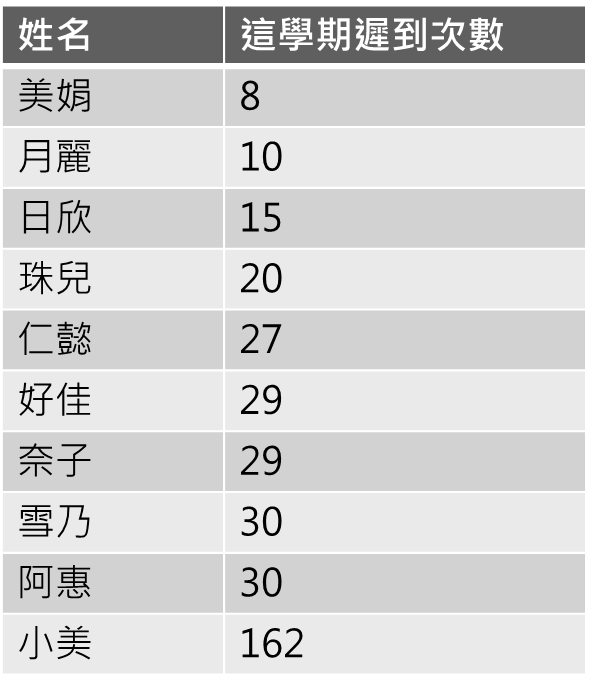
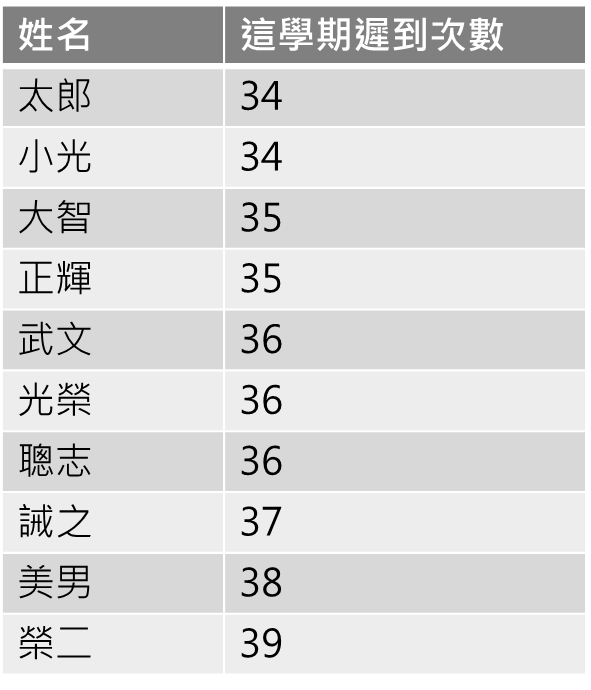

In [32]:
import numpy as np
girl=np.array([8,10,15,20,27,29,29,30,30,162])
boy=np.array([34,34,35,35,36,36,36,37,38,39])
print(girl)
girl_mean=np.mean(girl)
print("girl mean",girl_mean)
boy_mean=np.mean(boy)
print("boy mean",boy_mean)
girl_median=np.median(girl)
print("girl median",girl_median)
boy_median=np.median(boy)
print("boy median",boy_median)
girl_std=np.std(girl)
print("girl std",girl_std)
boy_std=np.std(boy)
print("boy std",boy_std)

[  8  10  15  20  27  29  29  30  30 162]
girl mean 36.0
boy mean 36.0
girl median 28.0
boy median 36.0
girl std 42.75979419969184
boy std 1.5491933384829668


## 範圍與百分位數
+ np.ptp( ) 計算最大與最小值的差（最大 -(減) 最小）。
+ np.percentile( ) 方法代表百分位數，用於統計數據的度量指標，需要三個參數：
  + array：陣列。
  + percent：計算的百分位數，介於 0 到 100 之間。
  + axis：進行計算的軸。
+ 百分位數是一種位置量數，有助於瞭解資料在最小值與最大值之間的分布情況。
+ p- 百分位數表示：
  + 至少有 p-百分比 (p%) 的觀察值小於或者等於他。
  + 至少有 (100-p)% 的觀察值大於或等於他。
+ 計算方式：
  + 將資料由小到大排序。
  + 計算 i=(p%*樣本數) 之位置。
  + 於 i 位置：
    + a. 若不是整數，無條件進位取比 i 大的下一個整數位置的值。
    + b. 若為整數，則由 i 與 i+1 兩個位置上的值取平均。


In [33]:
import numpy as np
a = np.array([[0, 30,45],
              [60,75,90]])
print(a)
print( )
print("---------------")
print(np.ptp(a))# 90-0
b=np.ptp(a, axis = 0)# [60-0,75-30,90-45]
print(b)
print("---------------")
b=np.ptp(a, axis = 1)#[45 -0,90-60]
print(b)
print("---------------")

[[ 0 30 45]
 [60 75 90]]

---------------
90
[60 45 45]
---------------
[45 30]
---------------


In [34]:
import numpy as np

arry = np.array([4,6,10,12,8])
#                           1 2 3  4 5 
# 注意percentile會在內部排序 4 6 8 10 12
# n是長度
# 位置=1+(n-1)*p n是全部元素的數量 p是百分比 
#以下案例是:n=5 p=50
"""
1+(5-1)*0.5 = 3
正好落在 index為3的位置 答案是8
"""
b = np.percentile(arry, 50) 
print("The percentile is:",b)

The percentile is: 8.0


In [35]:
import numpy as np
a = np.array([[11, 8, 9], [5, 4, 1]])
#以下案例是:n=6 p=25
# 1 2 3 4 5 6
# 1 4 5 8 9 11
"""
先算出位置:
1+(6-1)X0.25 = 2.25
因為落在2.25所以index為2與3之間的數值
2.25的小數部分取出 0.25 所以下列公式乘上0.25 
因為2的部分算好了 接下來要計算0.25的部分 這部分是5-4之間差值的0.25
4 + (5-4) * 0.25  = 4.25
"""
b = np.percentile(a, 25)
print("The percentile is:",b) 

The percentile is: 4.25


In [37]:
import numpy as np
a = np.array([[11, 8, 9], [5, 4, 1]])
"""
[11,8,9]
[5,4,1]
先算出位置:
因為axis=0 所以是垂直計算
1+(2-1) * 0.5 = 1.5 
計算出的index是1.5
1.5正好落在1與2之間 取出index:1與index:2的數做計算
1.5的小數部分取出 0.5 所以乘上0.5
5 + (11-5) * 0.5  = 8
"""
b = np.percentile(a, 50,axis=0)
print("The percentile is:",b)

The percentile is: [8. 6. 5.]


In [38]:
"""
[11,8,9]
[5,4,1]

8 9 11
1 4  5 

先算出位置:
因為axis=1 所以是水平計算
1+(3-1) x 0.5 = 2 
正好 index:2 所以9

先算出位置:
因為axis=1 所以是水平計算
1+(3-1) x 0.5 = 2
正好 index:2 所以4
"""

b = np.percentile(a, 50,axis=1)
print("The percentile is:",b)

The percentile is: [9. 4.]


## 累加與累差
+ np.cumsum( ) 方法進行指定軸資料的累加。
+ 參數：
  + array：陣列
  + axis：軸，沒有指定軸則會平坦化後進行累加
+ 維持原有的資料數量，且在計算結果上進行下一個計算。
+ np.diff( ) 方法進行指定軸資料的累差。
+ 參數：
  + array：陣列
  + axis：軸，沒有指定軸預設 axis 為 1
+ 以原資料進行資料內容刪除，若 axis 為 0 則減少一個 row，若 axis 為 1 減少一個 column。

In [39]:
import numpy as np
a = np.array([[1, 2, 3], 
              [13, 6, 9], 
              [12, 24, 36]])
print(a)
print(np.cumsum(a))
print("---------------")
print(np.cumsum(a,axis=0))
print("---------------")
print(np.cumsum(a,axis=1))
print("---------------")

[[ 1  2  3]
 [13  6  9]
 [12 24 36]]
[  1   3   6  19  25  34  46  70 106]
---------------
[[ 1  2  3]
 [14  8 12]
 [26 32 48]]
---------------
[[ 1  3  6]
 [13 19 28]
 [12 36 72]]
---------------


## 作業
## 請計算出 106 與 107 年每個月 0 到 9歲國小(含)之前的人數總計
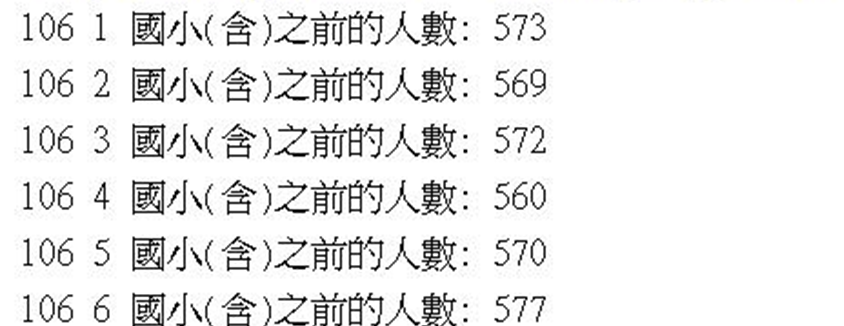